In [21]:
%run header.py data/ASIC-2-FPGA

Python version: 3.6.1 |Anaconda 4.4.0 (64-bit)| (default, May 11 2017, 13:25:24) [MSC v.1900 64 bit (AMD64)]
pandas version: 0.20.1
matplotlib version: 2.0.2
NumPy version: 1.14.1
SciPy version: 1.0.0
IPython version: 5.3.0
scikit-learn version: 0.19.1
-------------------------


In [22]:
# Load exhaustive training results
es_v4_lr = pd.read_csv('es_v4_lr.csv')
es_v4_ada = pd.read_csv('es_v4_ada.csv')
es_v4_rf = pd.read_csv('es_v4_rf.csv')

# direct mapping
dm_v4 = pd.read_csv('direct_mapping_v4.csv')
dm_v5 = pd.read_csv('direct_mapping_v5.csv')

# direct mapping with tolerance
dm_v4_01 = pd.read_csv('direct_mapping_v4_tolerance_0.1.csv')
dm_v5_01 = pd.read_csv('direct_mapping_v5_tolerance_0.1.csv')
dm_v4_005 = pd.read_csv('direct_mapping_v4_tolerance_0.05.csv')
dm_v5_005 = pd.read_csv('direct_mapping_v5_tolerance_0.05.csv')

In [23]:
def display_result(es, dm, **kwargs):
    """Print the training sets leading to better results on the testing sets."""
    train, test = es_vs_dm(es, dm, **kwargs)
    test_len = [len(x) for x in test]
    for i in np.argsort(test_len)[::-1]:
        print(train[i])
        print(test[i])
        print()
    return train, test

In [24]:
def verify_result(combo, es, dm):
    df_es = es.set_index('train').loc[[combo]]
    display(df_es)
    display(dm)

Linear Regression

In [25]:
%%time
train_lr, test_lr = display_result(es_v4_lr, dm_v4)

adpcm_encoder;aes;ann;average;fft_fixed;idct;kasumi;qsort;sobel
['decimation', 'fir', 'interpolation', 'snow3g']

adpcm_encoder;aes;ann;average;decimation;fft_fixed;idct;kasumi;qsort;sobel
['fir', 'interpolation', 'snow3g']

adpcm_encoder;aes;ann;decimation;fft_fixed;interpolation;kasumi;qsort;snow3g;sobel
['average', 'fir', 'idct']

adpcm_encoder;aes;ann;average;fft_fixed;fir;idct;kasumi;qsort;sobel
['decimation', 'interpolation', 'snow3g']

adpcm_encoder;aes;ann;average;fft_fixed;idct;kasumi;qsort;snow3g;sobel
['decimation', 'fir', 'interpolation']

adpcm_encoder;aes;ann;average;fft_fixed;idct;interpolation;kasumi;qsort;sobel
['decimation', 'fir', 'snow3g']

adpcm_encoder;aes;ann;fft_fixed;idct;interpolation;kasumi;qsort;snow3g;sobel
['average', 'decimation', 'fir']

adpcm_encoder;aes;ann;decimation;fft_fixed;idct;interpolation;kasumi;qsort;snow3g;sobel
['average', 'fir']

adpcm_encoder;aes;ann;average;decimation;fft_fixed;idct;kasumi;qsort;snow3g;sobel
['fir', 'interpolation']

adpc

In [26]:
# combo = 'adpcm_encoder;aes;ann;decimation;fft_fixed;interpolation;kasumi;qsort;snow3g;sobel'
# verify_result(combo, es_v4_lr, dm_v4)

Random Forest

In [27]:
%%time
train_rf, test_rf = display_result(es_v4_rf, dm_v4)

adpcm_encoder;aes;ann;fir;idct;sobel
['average', 'decimation', 'fft_fixed', 'interpolation', 'kasumi', 'qsort', 'snow3g']

aes;ann;fft_fixed;idct;interpolation;snow3g;sobel
['adpcm_encoder', 'average', 'decimation', 'fir', 'kasumi', 'qsort']

adpcm_encoder;aes;ann;fir;idct;kasumi;sobel
['average', 'decimation', 'fft_fixed', 'interpolation', 'qsort', 'snow3g']

adpcm_encoder;aes;ann;decimation;fir;idct;sobel
['average', 'fft_fixed', 'interpolation', 'kasumi', 'qsort', 'snow3g']

adpcm_encoder;aes;ann;average;fir;idct;sobel
['decimation', 'fft_fixed', 'interpolation', 'kasumi', 'qsort', 'snow3g']

adpcm_encoder;aes;ann;average;idct;kasumi;qsort
['decimation', 'fft_fixed', 'fir', 'interpolation', 'snow3g', 'sobel']

adpcm_encoder;aes;ann;decimation;fir;idct;kasumi;qsort
['average', 'fft_fixed', 'interpolation', 'snow3g', 'sobel']

aes;ann;decimation;fir;idct;kasumi;qsort;snow3g
['adpcm_encoder', 'average', 'fft_fixed', 'interpolation', 'sobel']

aes;ann;decimation;fft_fixed;fir;idct;inter

In [28]:
# combo = 'adpcm_encoder;aes;ann;fir;idct;sobel'
# verify_result(combo, es_v4_rf, dm_v4)

AdaBoost Decision Tree

In [29]:
%%time
train_ada, test_ada = display_result(es_v4_ada, dm_v4)

adpcm_encoder;aes;ann;average;decimation;idct
['fft_fixed', 'fir', 'interpolation', 'kasumi', 'qsort', 'snow3g', 'sobel']

adpcm_encoder;aes;ann;fft_fixed;qsort;snow3g;sobel
['average', 'decimation', 'fir', 'idct', 'interpolation', 'kasumi']

adpcm_encoder;aes;ann;idct;kasumi;qsort;sobel
['average', 'decimation', 'fft_fixed', 'fir', 'interpolation', 'snow3g']

adpcm_encoder;aes;ann;decimation;fft_fixed;snow3g;sobel
['average', 'fir', 'idct', 'interpolation', 'kasumi', 'qsort']

aes;ann;decimation;fir;idct;qsort;snow3g
['adpcm_encoder', 'average', 'fft_fixed', 'interpolation', 'kasumi', 'sobel']

adpcm_encoder;aes;ann;decimation;fft_fixed;fir;qsort
['average', 'idct', 'interpolation', 'kasumi', 'snow3g', 'sobel']

adpcm_encoder;aes;ann;fir;interpolation;qsort;snow3g
['average', 'decimation', 'fft_fixed', 'idct', 'kasumi', 'sobel']

adpcm_encoder;aes;ann;average;fir;idct;sobel
['decimation', 'fft_fixed', 'interpolation', 'kasumi', 'qsort', 'snow3g']

adpcm_encoder;aes;ann;decimation;fir;

In [30]:
# combo = 'adpcm_encoder;aes;ann;decimation;fft_fixed;interpolation;kasumi;qsort;snow3g;sobel'
# verify_result(combo, es_v4_ada, dm_v4)

Linear Regression some

In [31]:
%%time
train_lr_some, test_lr_some = display_result(es_v4_lr, dm_v4, option='some')

adpcm_encoder;fft_fixed;sobel
['aes', 'ann', 'average', 'decimation', 'fir', 'idct', 'interpolation', 'snow3g']

fft_fixed;interpolation
['aes', 'ann', 'average', 'decimation', 'fir', 'idct', 'snow3g', 'sobel']

fft_fixed;interpolation;qsort
['aes', 'average', 'decimation', 'fir', 'idct', 'snow3g', 'sobel']

fft_fixed;interpolation;sobel
['aes', 'ann', 'average', 'decimation', 'fir', 'idct', 'snow3g']

fft_fixed;sobel
['aes', 'average', 'decimation', 'fir', 'idct', 'interpolation', 'snow3g']

average;fft_fixed;interpolation
['aes', 'ann', 'decimation', 'fir', 'idct', 'snow3g', 'sobel']

adpcm_encoder;fft_fixed;interpolation;qsort
['aes', 'average', 'decimation', 'fir', 'idct', 'snow3g', 'sobel']

adpcm_encoder;fft_fixed;interpolation
['aes', 'average', 'decimation', 'fir', 'idct', 'snow3g', 'sobel']

fft_fixed
['adpcm_encoder', 'aes', 'average', 'decimation', 'fir', 'kasumi', 'sobel']

fir;interpolation
['aes', 'average', 'decimation', 'fft_fixed', 'idct', 'snow3g', 'sobel']

adpcm_enc

adpcm_encoder;aes;average;fft_fixed;idct;interpolation;qsort
['decimation', 'fir', 'snow3g', 'sobel']

adpcm_encoder;decimation;interpolation
['average', 'fir', 'snow3g', 'sobel']

adpcm_encoder;fft_fixed;idct;interpolation;kasumi;qsort;sobel
['average', 'decimation', 'fir', 'snow3g']

adpcm_encoder;aes;average;fft_fixed;snow3g;sobel
['decimation', 'fir', 'idct', 'kasumi']

adpcm_encoder;decimation;fft_fixed;fir;qsort;snow3g;sobel
['aes', 'average', 'idct', 'kasumi']

adpcm_encoder;decimation;fft_fixed;idct
['average', 'kasumi', 'snow3g', 'sobel']

average;decimation;fft_fixed;qsort
['aes', 'fir', 'idct', 'kasumi']

aes;average;interpolation;qsort;sobel
['decimation', 'fir', 'idct', 'snow3g']

adpcm_encoder;ann;fft_fixed;interpolation
['decimation', 'fir', 'idct', 'snow3g']

adpcm_encoder;fft_fixed;fir;kasumi;snow3g;sobel
['aes', 'average', 'decimation', 'idct']

adpcm_encoder;ann;average;fft_fixed;fir;sobel
['decimation', 'idct', 'interpolation', 'snow3g']

aes;ann;fft_fixed;idct;qsor

['average', 'fir', 'idct']

adpcm_encoder;average;decimation;fft_fixed;fir;idct;sobel
['interpolation', 'kasumi', 'snow3g']

adpcm_encoder;aes;ann;decimation;fft_fixed;interpolation;kasumi;snow3g
['average', 'fir', 'idct']

adpcm_encoder;ann;decimation;interpolation;kasumi
['average', 'fir', 'idct']

interpolation;kasumi;qsort;sobel
['average', 'decimation', 'fir']

aes;decimation;idct;kasumi;snow3g;sobel
['average', 'fir', 'interpolation']

ann;fft_fixed;interpolation;kasumi;snow3g
['average', 'fir', 'idct']

aes;ann;average;fft_fixed;fir;interpolation;sobel
['decimation', 'idct', 'snow3g']

fft_fixed;fir;idct;interpolation;kasumi;qsort;snow3g
['average', 'decimation', 'sobel']

adpcm_encoder;average;decimation;idct;kasumi;sobel
['fir', 'interpolation', 'snow3g']

adpcm_encoder;decimation;fft_fixed;fir;interpolation;snow3g
['aes', 'average', 'idct']

decimation;idct;kasumi;snow3g;sobel
['average', 'fir', 'interpolation']

adpcm_encoder;aes;fir;interpolation
['average', 'decimation', '


ann;decimation;fft_fixed;fir;kasumi;snow3g
['average', 'idct']

ann;decimation;idct;interpolation;sobel
['average', 'fft_fixed']

aes;interpolation;kasumi
['average', 'decimation']

ann;average;decimation;snow3g
['fir', 'idct']

adpcm_encoder;aes;fir;idct;interpolation;kasumi
['average', 'snow3g']

fft_fixed;idct;interpolation;qsort;snow3g
['decimation', 'sobel']

aes;ann;average;decimation;fft_fixed;fir;idct;kasumi
['interpolation', 'snow3g']

adpcm_encoder;aes;average;fft_fixed;interpolation;kasumi;sobel
['decimation', 'idct']

adpcm_encoder;ann;decimation;fft_fixed;interpolation;kasumi;sobel
['fir', 'idct']

adpcm_encoder;idct;interpolation;qsort;sobel
['average', 'fir']

adpcm_encoder;aes;ann;average;snow3g
['fir', 'idct']

aes;average;fft_fixed;idct;kasumi;qsort
['decimation', 'sobel']

adpcm_encoder;aes;decimation;interpolation;kasumi;qsort;sobel
['average', 'fir']

aes;ann;average;decimation;qsort
['fir', 'idct']

ann;average;snow3g;sobel
['fir', 'idct']

aes;decimation;fir;idc

adpcm_encoder;aes;ann;decimation;fir;interpolation;kasumi;snow3g;sobel
['average', 'idct']

average;interpolation;kasumi;qsort;snow3g;sobel
['decimation', 'fir']

adpcm_encoder;aes;ann;fft_fixed;interpolation;snow3g;sobel
['fir', 'idct']

adpcm_encoder;average;decimation;fft_fixed;idct;interpolation;qsort;snow3g
['fir', 'sobel']

adpcm_encoder;aes;ann;average;fft_fixed;snow3g;sobel
['fir', 'idct']

ann;fft_fixed;idct;interpolation;kasumi;snow3g
['decimation', 'fir']

aes;ann;average;decimation;fft_fixed;idct;qsort;snow3g
['fir', 'interpolation']

aes;ann;decimation;fir;kasumi;snow3g
['average', 'idct']

ann;fft_fixed;fir;idct;qsort;snow3g
['decimation', 'interpolation']

ann;average;decimation;fft_fixed;idct;qsort;sobel
['fir', 'interpolation']

aes;average;fft_fixed;fir;idct;interpolation;sobel
['decimation', 'snow3g']

average;idct;kasumi;sobel
['fir', 'snow3g']

ann;decimation;idct;interpolation;kasumi;qsort;sobel
['fir', 'snow3g']

ann;average;decimation;fft_fixed;fir;idct;kasumi;q

adpcm_encoder;ann;average;decimation;fir;kasumi
['idct']

ann;average;decimation;fir;qsort;snow3g;sobel
['idct']

ann;average;decimation;idct;interpolation;qsort;snow3g
['fir']

adpcm_encoder;average;decimation;qsort;snow3g;sobel
['idct']

adpcm_encoder;ann;average;idct;kasumi;sobel
['snow3g']

aes;ann;average;idct;kasumi
['snow3g']

adpcm_encoder;ann;decimation;fft_fixed;fir;qsort;snow3g;sobel
['idct']

aes;ann;decimation;fir;idct;interpolation;kasumi;qsort;sobel
['snow3g']

ann;average;decimation;fir;sobel
['interpolation']

adpcm_encoder;aes;ann;idct;interpolation;kasumi;qsort;snow3g;sobel
['fir']

adpcm_encoder;average;decimation;fir;idct;interpolation;kasumi
['snow3g']

adpcm_encoder;aes;ann;fft_fixed;fir;idct;interpolation;snow3g;sobel
['decimation']

adpcm_encoder;aes;average;fft_fixed;fir;idct;kasumi;qsort;sobel
['decimation']

ann;average;decimation;fft_fixed;fir;kasumi;qsort
['idct']

adpcm_encoder;aes;ann;idct;interpolation;kasumi;qsort;snow3g
['fir']

aes;ann;average;interp


adpcm_encoder;ann;fir;idct;sobel
['fft_fixed']

adpcm_encoder;decimation;fir;interpolation;kasumi;qsort
['average']

adpcm_encoder;ann;decimation;fft_fixed;idct;interpolation;kasumi;qsort;snow3g
['average']

adpcm_encoder;aes;average;fft_fixed;fir;idct;interpolation;snow3g;sobel
['decimation']

aes;ann;average;idct;kasumi;qsort;sobel
['snow3g']

average;decimation;fir;idct;kasumi;snow3g;sobel
['interpolation']

adpcm_encoder;aes;interpolation;kasumi;qsort;snow3g
['average']

aes;ann;average;idct;kasumi;qsort;snow3g;sobel
['fir']

adpcm_encoder;ann;average;fir;kasumi;qsort;sobel
['idct']

ann;decimation;fir;kasumi;qsort
['idct']

adpcm_encoder;ann;average;decimation;fir;sobel
['idct']

ann;average;decimation;idct;kasumi;qsort;snow3g
['fir']

adpcm_encoder;ann;fir;interpolation;qsort;snow3g;sobel
['average']

aes;average;decimation;fir;kasumi;qsort;snow3g
['idct']

ann;average;decimation;fft_fixed;fir;interpolation;snow3g
['idct']

adpcm_encoder;ann;decimation;fir;idct
['average']

adpc

In [32]:
# combo = 'adpcm_encoder;fft_fixed;sobel'
# verify_result(combo, es_v4_lr, dm_v4)

Random Forest some

In [33]:
%%time
train_rf_some, test_rf_some = display_result(es_v4_rf, dm_v4, option='some')

aes;decimation
['ann', 'average', 'fft_fixed', 'fir', 'idct', 'interpolation', 'qsort', 'snow3g', 'sobel']

adpcm_encoder;aes
['average', 'decimation', 'fft_fixed', 'fir', 'idct', 'interpolation', 'kasumi', 'snow3g', 'sobel']

adpcm_encoder;aes;qsort
['average', 'decimation', 'fft_fixed', 'fir', 'idct', 'interpolation', 'snow3g', 'sobel']

aes;average;fft_fixed;qsort
['ann', 'decimation', 'fir', 'idct', 'interpolation', 'kasumi', 'snow3g', 'sobel']

adpcm_encoder;aes;fft_fixed;idct
['average', 'decimation', 'fir', 'interpolation', 'kasumi', 'qsort', 'snow3g', 'sobel']

adpcm_encoder;average;kasumi
['decimation', 'fft_fixed', 'fir', 'idct', 'interpolation', 'qsort', 'snow3g', 'sobel']

aes;sobel
['average', 'decimation', 'fft_fixed', 'fir', 'idct', 'interpolation', 'kasumi', 'snow3g']

adpcm_encoder;aes;idct
['average', 'decimation', 'fft_fixed', 'fir', 'kasumi', 'qsort', 'snow3g', 'sobel']

aes;idct;interpolation;sobel
['adpcm_encoder', 'average', 'decimation', 'fft_fixed', 'fir', 'kas

['average', 'fft_fixed', 'fir', 'kasumi', 'sobel']

aes;average;decimation;idct;kasumi;sobel
['adpcm_encoder', 'fft_fixed', 'fir', 'qsort', 'snow3g']

ann;decimation;idct;kasumi;sobel
['average', 'fft_fixed', 'fir', 'interpolation', 'snow3g']

average;fir;idct;interpolation;snow3g
['adpcm_encoder', 'decimation', 'fft_fixed', 'qsort', 'sobel']

aes;ann;decimation;kasumi;qsort;snow3g
['average', 'fft_fixed', 'idct', 'interpolation', 'sobel']

aes;ann;fir;idct;snow3g
['average', 'decimation', 'fft_fixed', 'interpolation', 'sobel']

adpcm_encoder;ann;average;decimation;fft_fixed;idct;snow3g
['fir', 'interpolation', 'kasumi', 'qsort', 'sobel']

aes;decimation;fir;qsort
['average', 'fft_fixed', 'idct', 'kasumi', 'snow3g']

aes;fft_fixed;interpolation;kasumi;sobel
['average', 'decimation', 'fir', 'idct', 'snow3g']

ann;decimation;fir;interpolation;kasumi
['average', 'fft_fixed', 'idct', 'snow3g', 'sobel']

adpcm_encoder;aes;average;interpolation;qsort;sobel
['decimation', 'fft_fixed', 'idct',

adpcm_encoder;aes;ann;fft_fixed;idct;interpolation;kasumi;sobel
['average', 'decimation', 'fir', 'snow3g']

average;idct;interpolation;kasumi;qsort;sobel
['decimation', 'fft_fixed', 'fir', 'snow3g']

adpcm_encoder;aes;decimation;fir;sobel
['average', 'fft_fixed', 'kasumi', 'snow3g']

aes;ann;interpolation;kasumi;sobel
['average', 'decimation', 'idct', 'snow3g']

aes;ann;fft_fixed;fir;interpolation;snow3g;sobel
['average', 'decimation', 'idct', 'kasumi']

adpcm_encoder;average;fir;interpolation;kasumi;snow3g
['decimation', 'idct', 'qsort', 'sobel']

decimation;idct;snow3g;sobel
['adpcm_encoder', 'average', 'fir', 'interpolation']

average;decimation;idct;interpolation
['fft_fixed', 'fir', 'snow3g', 'sobel']

ann;decimation;fft_fixed;idct;interpolation;kasumi;snow3g;sobel
['adpcm_encoder', 'average', 'fir', 'qsort']

adpcm_encoder;average;decimation;fir;qsort;sobel
['fft_fixed', 'idct', 'kasumi', 'snow3g']

adpcm_encoder;aes;ann;decimation;fir;idct;interpolation
['average', 'fft_fixed', 

['decimation', 'fft_fixed', 'fir', 'interpolation']

adpcm_encoder;ann;average;idct;kasumi;qsort;snow3g
['fft_fixed', 'fir', 'interpolation', 'sobel']

adpcm_encoder;fir;kasumi;qsort;snow3g
['average', 'idct', 'interpolation', 'sobel']

adpcm_encoder;aes;ann;kasumi;qsort
['average', 'decimation', 'interpolation', 'sobel']

adpcm_encoder;aes;fft_fixed;idct;kasumi;qsort;snow3g
['average', 'decimation', 'fir', 'interpolation']

aes;average;decimation;idct;kasumi
['adpcm_encoder', 'fft_fixed', 'fir', 'sobel']

adpcm_encoder;decimation;qsort;snow3g;sobel
['aes', 'average', 'fir', 'interpolation']

average;decimation;fft_fixed;idct;sobel
['fir', 'kasumi', 'qsort', 'snow3g']

aes;ann;average;decimation;kasumi;qsort;snow3g
['fft_fixed', 'idct', 'interpolation', 'sobel']

adpcm_encoder;ann;decimation;interpolation
['average', 'idct', 'kasumi', 'snow3g']

adpcm_encoder;ann;average;fft_fixed;idct;kasumi;qsort
['decimation', 'fir', 'interpolation', 'sobel']

aes;average;decimation;interpolation
['

['average', 'idct', 'kasumi']

adpcm_encoder;aes;ann;average;decimation;fft_fixed;fir;interpolation;snow3g
['idct', 'kasumi', 'sobel']

aes;ann;fft_fixed;fir;interpolation;qsort;snow3g;sobel
['decimation', 'idct', 'kasumi']

average;fft_fixed;fir;kasumi;snow3g;sobel
['decimation', 'idct', 'interpolation']

adpcm_encoder;ann;average;kasumi;qsort;snow3g
['fft_fixed', 'fir', 'interpolation']

aes;ann;average;idct;kasumi;qsort;snow3g;sobel
['decimation', 'fft_fixed', 'interpolation']

adpcm_encoder;ann;average;kasumi;qsort;snow3g;sobel
['decimation', 'fft_fixed', 'interpolation']

adpcm_encoder;aes;average;decimation;fir;idct;kasumi;snow3g
['fft_fixed', 'interpolation', 'sobel']

adpcm_encoder;aes;average;idct;snow3g;sobel
['fir', 'interpolation', 'kasumi']

adpcm_encoder;aes;ann;average;idct;interpolation;kasumi;qsort;snow3g
['decimation', 'fft_fixed', 'fir']

aes;fft_fixed;fir;idct;kasumi;qsort;sobel
['average', 'decimation', 'interpolation']

average;decimation;fir;kasumi;snow3g;sobel
[

['average', 'fir', 'kasumi']

adpcm_encoder;idct;interpolation;kasumi;snow3g
['average', 'decimation', 'qsort']

adpcm_encoder;ann;average;fir;interpolation;kasumi;qsort;snow3g
['decimation', 'fft_fixed', 'sobel']

adpcm_encoder;ann;average;decimation;fft_fixed;fir;interpolation;snow3g
['idct', 'kasumi', 'sobel']

fft_fixed;idct;interpolation
['fir', 'kasumi', 'snow3g']

adpcm_encoder;aes;ann;average;decimation;idct;kasumi;snow3g;sobel
['fft_fixed', 'fir', 'interpolation']

fir;idct;interpolation;kasumi;sobel
['average', 'decimation', 'snow3g']

adpcm_encoder;aes;average;fft_fixed;idct;kasumi;snow3g;sobel
['decimation', 'fir', 'interpolation']

adpcm_encoder;aes;decimation;fir;interpolation;qsort;snow3g;sobel
['average', 'fft_fixed', 'idct']

aes;ann;average;decimation;fft_fixed;fir;qsort
['idct', 'kasumi', 'snow3g']

adpcm_encoder;aes;average;fir;idct;kasumi;qsort
['decimation', 'interpolation', 'sobel']

adpcm_encoder;average;fft_fixed;idct;kasumi;snow3g;sobel
['decimation', 'fir', '

['idct', 'snow3g']

adpcm_encoder;aes;fft_fixed;idct;interpolation;qsort;snow3g
['decimation', 'fir']

adpcm_encoder;ann;decimation;fft_fixed;idct;qsort;snow3g;sobel
['average', 'kasumi']

adpcm_encoder;ann;average;fft_fixed;fir;idct;interpolation;kasumi;qsort
['decimation', 'sobel']

ann;average;fft_fixed;idct;interpolation;sobel
['decimation', 'fir']

average;decimation;fft_fixed;fir;idct;qsort;sobel
['interpolation', 'kasumi']

adpcm_encoder;aes;ann;decimation;idct;interpolation;kasumi;qsort;snow3g
['fft_fixed', 'fir']

adpcm_encoder;ann;average;fir;idct;interpolation;kasumi;snow3g;sobel
['decimation', 'qsort']

average;decimation;fir;idct;kasumi;qsort;snow3g;sobel
['adpcm_encoder', 'interpolation']

adpcm_encoder;average;decimation;idct;qsort;snow3g;sobel
['fir', 'interpolation']

adpcm_encoder;aes;ann;average;decimation;fir;qsort
['idct', 'snow3g']

aes;ann;fft_fixed;qsort;snow3g
['average', 'idct']

adpcm_encoder;aes;ann;average;decimation;fft_fixed;fir;idct;interpolation;qsort;s

['idct']

aes;average;kasumi;snow3g;sobel
['interpolation']

adpcm_encoder;aes;fir;interpolation;kasumi;qsort;snow3g;sobel
['average']

aes;ann;average;decimation;fir;interpolation;kasumi;snow3g;sobel
['idct']

decimation;snow3g;sobel
['aes']

adpcm_encoder;aes;ann;decimation;fft_fixed;snow3g
['idct']

aes;ann;average;decimation;fft_fixed;fir;interpolation;kasumi;qsort;snow3g
['idct']

average;decimation;fft_fixed;idct;interpolation;kasumi;qsort;snow3g;sobel
['fir']

adpcm_encoder;aes;ann;average;decimation;fir;idct;interpolation;snow3g;sobel
['qsort']

adpcm_encoder;aes;average;decimation;kasumi;snow3g
['fir']

adpcm_encoder;aes;ann;interpolation;kasumi;qsort
['decimation']

ann;average;decimation;fft_fixed;idct;interpolation;kasumi;sobel
['fir']

adpcm_encoder;ann;average;fft_fixed;fir;interpolation;kasumi;qsort;sobel
['decimation']

aes;ann;average;decimation;fft_fixed;kasumi;qsort;snow3g
['sobel']

adpcm_encoder;aes;ann;average;decimation;fir;idct;interpolation;kasumi;qsort;snow3g;

In [34]:
# combo = 'adpcm_encoder;fft_fixed;sobel'
# verify_result(combo, es_v4_rf, dm_v4)

AdaBoost Decision Tree some

In [35]:
%%time
train_ada_some, test_ada_some = display_result(es_v4_ada, dm_v4, option='some')

aes
['adpcm_encoder', 'average', 'decimation', 'fft_fixed', 'fir', 'idct', 'kasumi', 'snow3g', 'sobel']

adpcm_encoder;aes;ann;idct
['average', 'decimation', 'fft_fixed', 'fir', 'interpolation', 'kasumi', 'qsort', 'snow3g']

sobel
['average', 'decimation', 'fir', 'idct', 'interpolation', 'kasumi', 'qsort', 'snow3g']

aes;ann;idct;snow3g
['adpcm_encoder', 'average', 'decimation', 'fft_fixed', 'fir', 'interpolation', 'kasumi', 'sobel']

fft_fixed;kasumi;sobel
['adpcm_encoder', 'aes', 'average', 'decimation', 'fir', 'idct', 'interpolation', 'snow3g']

average;sobel
['decimation', 'fft_fixed', 'fir', 'idct', 'interpolation', 'kasumi', 'qsort', 'snow3g']

aes;idct;interpolation;kasumi
['adpcm_encoder', 'average', 'decimation', 'fft_fixed', 'fir', 'qsort', 'snow3g', 'sobel']

adpcm_encoder;ann;idct
['average', 'decimation', 'fft_fixed', 'fir', 'interpolation', 'kasumi', 'qsort', 'snow3g']

fir;idct
['average', 'decimation', 'fft_fixed', 'interpolation', 'kasumi', 'qsort', 'snow3g', 'sobel']


['average', 'decimation', 'fft_fixed', 'qsort', 'sobel']

adpcm_encoder;ann;fft_fixed;kasumi;qsort;snow3g;sobel
['average', 'decimation', 'fir', 'idct', 'interpolation']

average;decimation;fir;idct;kasumi;sobel
['adpcm_encoder', 'fft_fixed', 'interpolation', 'qsort', 'snow3g']

aes;fir;idct;interpolation;snow3g
['adpcm_encoder', 'average', 'decimation', 'fft_fixed', 'sobel']

fft_fixed;idct;kasumi
['average', 'decimation', 'fir', 'interpolation', 'sobel']

aes;ann;average;idct;qsort;snow3g
['adpcm_encoder', 'decimation', 'fft_fixed', 'fir', 'interpolation']

adpcm_encoder;decimation;fir;interpolation;kasumi
['average', 'fft_fixed', 'idct', 'snow3g', 'sobel']

aes;ann;decimation;kasumi;qsort;snow3g
['average', 'fft_fixed', 'idct', 'interpolation', 'sobel']

adpcm_encoder;ann;decimation;fft_fixed;idct;snow3g
['average', 'fir', 'interpolation', 'kasumi', 'qsort']

average;fir;idct;qsort;sobel
['adpcm_encoder', 'decimation', 'fft_fixed', 'kasumi', 'snow3g']

adpcm_encoder;ann;idct;kasumi;

ann;average;fft_fixed;kasumi;snow3g;sobel
['decimation', 'fir', 'idct', 'interpolation']

adpcm_encoder;ann;decimation;fir;idct;kasumi;sobel
['average', 'fft_fixed', 'interpolation', 'qsort']

ann;average;idct;qsort;snow3g
['adpcm_encoder', 'fft_fixed', 'fir', 'interpolation']

aes;ann;average;fft_fixed;idct;interpolation
['decimation', 'fir', 'kasumi', 'sobel']

adpcm_encoder;aes;ann;average;fft_fixed;idct
['decimation', 'kasumi', 'snow3g', 'sobel']

adpcm_encoder;ann;average;idct;interpolation;kasumi;sobel
['decimation', 'fft_fixed', 'fir', 'snow3g']

adpcm_encoder;average;decimation;fir;interpolation;kasumi;snow3g
['fft_fixed', 'idct', 'qsort', 'sobel']

adpcm_encoder;aes;average;fft_fixed;snow3g;sobel
['decimation', 'fir', 'idct', 'interpolation']

adpcm_encoder;decimation;fir;kasumi;snow3g;sobel
['aes', 'average', 'fft_fixed', 'interpolation']

decimation;fft_fixed;idct;snow3g;sobel
['adpcm_encoder', 'average', 'fir', 'interpolation']

ann;average;idct;interpolation;kasumi;snow3g


['decimation', 'fft_fixed', 'fir', 'qsort']

adpcm_encoder;aes;average;decimation;fir;sobel
['fft_fixed', 'kasumi', 'qsort', 'snow3g']

adpcm_encoder;aes;ann;average;decimation;idct;snow3g;sobel
['fft_fixed', 'fir', 'interpolation', 'qsort']

adpcm_encoder;aes;fir;idct;kasumi
['average', 'decimation', 'interpolation', 'sobel']

adpcm_encoder;aes;ann;interpolation;snow3g;sobel
['average', 'decimation', 'idct', 'kasumi']

adpcm_encoder;ann;average;fft_fixed;idct;qsort;snow3g
['decimation', 'fir', 'kasumi', 'sobel']

adpcm_encoder;aes;ann;decimation;fir;idct;qsort;snow3g
['average', 'fft_fixed', 'interpolation', 'sobel']

adpcm_encoder;ann;average;decimation;kasumi;snow3g
['aes', 'fft_fixed', 'idct', 'qsort']

aes;average;fft_fixed;fir;idct;interpolation;qsort
['decimation', 'kasumi', 'snow3g', 'sobel']

aes;decimation;idct;interpolation;kasumi;snow3g;sobel
['adpcm_encoder', 'ann', 'average', 'fft_fixed']

ann;average;idct;interpolation
['decimation', 'fir', 'snow3g', 'sobel']

ann;decima

aes;ann;average;decimation;fft_fixed;snow3g;sobel
['fir', 'idct', 'interpolation']

aes;ann;average;fft_fixed;fir;interpolation;kasumi;qsort;sobel
['decimation', 'idct', 'snow3g']

adpcm_encoder;aes;ann;fft_fixed;idct;interpolation;sobel
['average', 'decimation', 'fir']

adpcm_encoder;ann;average;fft_fixed;qsort
['decimation', 'snow3g', 'sobel']

aes;ann;average;decimation;fft_fixed;snow3g
['fir', 'idct', 'sobel']

adpcm_encoder;decimation;fft_fixed;idct;interpolation
['average', 'fir', 'snow3g']

aes;fir;snow3g
['average', 'interpolation', 'sobel']

adpcm_encoder;ann;average;decimation;fir;idct;kasumi;sobel
['interpolation', 'qsort', 'snow3g']

adpcm_encoder;aes;fft_fixed;idct;interpolation;snow3g
['average', 'decimation', 'qsort']

adpcm_encoder;decimation;fir;idct;kasumi
['average', 'interpolation', 'sobel']

adpcm_encoder;aes;ann;fir;idct;interpolation;kasumi;qsort;snow3g;sobel
['average', 'decimation', 'fft_fixed']

adpcm_encoder;aes;ann;fft_fixed;interpolation;kasumi
['average', 

['average', 'interpolation', 'kasumi']

aes;average;fft_fixed;fir;idct;qsort;snow3g;sobel
['decimation', 'interpolation', 'kasumi']

adpcm_encoder;aes;ann;decimation;fft_fixed;fir;interpolation;snow3g;sobel
['average', 'idct', 'kasumi']

adpcm_encoder;aes;ann;average;fir
['decimation', 'fft_fixed', 'snow3g']

adpcm_encoder;average;decimation;fir;snow3g
['aes', 'interpolation', 'kasumi']

ann;average;fir;qsort;sobel
['decimation', 'idct', 'kasumi']

aes;ann;average;fir;idct;interpolation;kasumi;snow3g
['decimation', 'fft_fixed', 'sobel']

aes;ann;fir;interpolation;kasumi;qsort;sobel
['average', 'decimation', 'snow3g']

aes;ann;average;decimation;idct;kasumi;sobel
['fft_fixed', 'fir', 'interpolation']

aes;ann;average;fir;interpolation;kasumi;qsort;sobel
['decimation', 'fft_fixed', 'snow3g']

adpcm_encoder;decimation;fft_fixed;fir;interpolation;kasumi;qsort;sobel
['average', 'idct', 'snow3g']

adpcm_encoder;aes;average;idct;interpolation;snow3g;sobel
['decimation', 'fft_fixed', 'fir']

a


ann;average;decimation;fir;idct;snow3g;sobel
['fft_fixed', 'interpolation']

aes;average;idct;kasumi;snow3g;sobel
['adpcm_encoder', 'decimation']

aes;ann;fir;interpolation;kasumi;snow3g;sobel
['average', 'decimation']

aes;decimation;fft_fixed;fir;interpolation;qsort;snow3g;sobel
['average', 'idct']

ann;average;decimation;fft_fixed;fir;idct;interpolation;kasumi;snow3g
['qsort', 'sobel']

ann;average;decimation;interpolation;kasumi;snow3g
['idct', 'sobel']

adpcm_encoder;ann;average;fir;idct;qsort;snow3g;sobel
['fft_fixed', 'interpolation']

adpcm_encoder;ann;decimation;fft_fixed;fir;kasumi;snow3g;sobel
['average', 'idct']

aes;ann;decimation;fft_fixed;idct;kasumi;qsort;snow3g
['average', 'fir']

adpcm_encoder;aes;ann;average;decimation;fft_fixed;idct;interpolation;kasumi
['fir', 'snow3g']

adpcm_encoder;ann;fft_fixed;idct;qsort;snow3g
['decimation', 'kasumi']

aes;ann;average;idct;interpolation;kasumi;qsort;snow3g;sobel
['decimation', 'fft_fixed']

adpcm_encoder;aes;average;decimati

['average']

adpcm_encoder;aes;ann;decimation;fft_fixed;idct;kasumi;snow3g;sobel
['average']

adpcm_encoder;aes;ann;decimation;fft_fixed;idct;interpolation;snow3g
['average']

average;decimation;interpolation;kasumi;qsort;snow3g;sobel
['aes']

adpcm_encoder;average;decimation;fft_fixed;idct;interpolation;kasumi;snow3g;sobel
['fir']

adpcm_encoder;ann;average;decimation;fft_fixed;interpolation;kasumi;snow3g;sobel
['idct']

adpcm_encoder;aes;ann;average;decimation;fft_fixed;idct;interpolation;snow3g;sobel
['fir']

adpcm_encoder;average;decimation;fft_fixed;fir;idct;interpolation;kasumi;qsort
['sobel']

fft_fixed;fir;idct;interpolation;qsort;snow3g
['average']

ann;average;decimation;interpolation;kasumi;qsort;snow3g;sobel
['fft_fixed']

average;decimation;fir;idct;interpolation;kasumi;snow3g;sobel
['fft_fixed']

aes;ann;average;decimation;fir;interpolation;kasumi;snow3g;sobel
['idct']

ann;average;decimation;fft_fixed;fir;idct;interpolation;kasumi;qsort;snow3g
['sobel']

ann;average;inte

In [36]:
# combo = 'adpcm_encoder;fft_fixed;sobel'
# verify_result(combo, es_v4_ada, dm_v4)

=========================================

In [156]:
df = gd.data_v4['fft_fixed']
df.drop(['index'], axis=1).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974 entries, 0 to 973
Data columns (total 35 columns):
AREA              974 non-null int64
state             974 non-null int64
FU                974 non-null int64
REG               974 non-null int64
MUX               974 non-null int64
DEC               974 non-null int64
pin_pair          974 non-null int64
net               974 non-null int64
max               974 non-null int64
min               974 non-null int64
ave               974 non-null float64
MISC              974 non-null int64
MEM               974 non-null object
CP_delay          974 non-null object
sim               974 non-null object
Pmax              974 non-null object
Pmin              974 non-null object
Pave              974 non-null object
Latency           974 non-null int64
BlockMemoryBit    974 non-null object
DSP               974 non-null object
FU.1              974 non-null int64
ATTR              974 non-null object
ARRAY_1           974 non-null ob

In [160]:
MultiObjective.is_pareto_efficient(df[['Latency', 'Slices']].as_matrix())

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
        True, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False,  True, False, False,
        True, False,

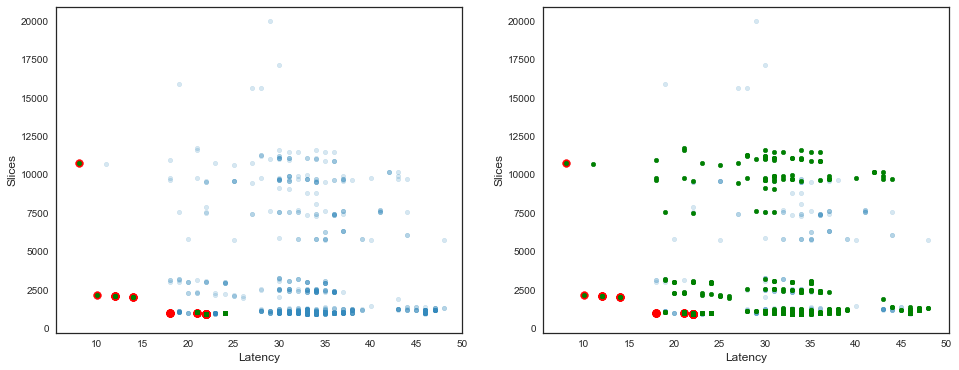

{'adrs_ave': 0.015398118727781797,
 'adrs_ave_rms': 0.0014232909063817728,
 'adrs_max': 0.100418410041841,
 'adrs_max_rms': 0.00665580069751337,
 'cardinality': 237,
 'dominance': 0.7142857142857143,
 'hypervolume': 0.46073723663647526}

In [247]:
DirectMapping.main(gd.data_v4['qsort'], plot_figure=True, with_tolerance=0.15)

In [197]:
def observe_area_slices_latency(df):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
    df.plot(kind='scatter', x='Latency', y='AREA', alpha=0.2, ax=axes[0])
    df.plot(kind='scatter', x='Latency', y='Slices', alpha=0.2, ax=axes[1])
    plt.show()

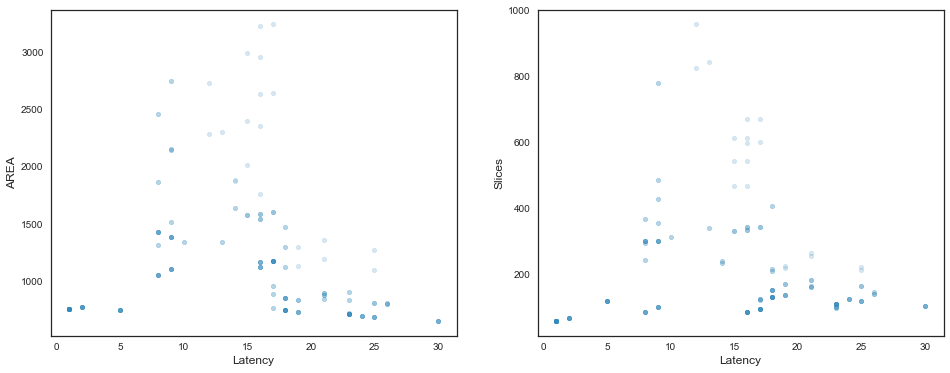

In [203]:
observe_area_slices_latency(gd.data_v4['average'])

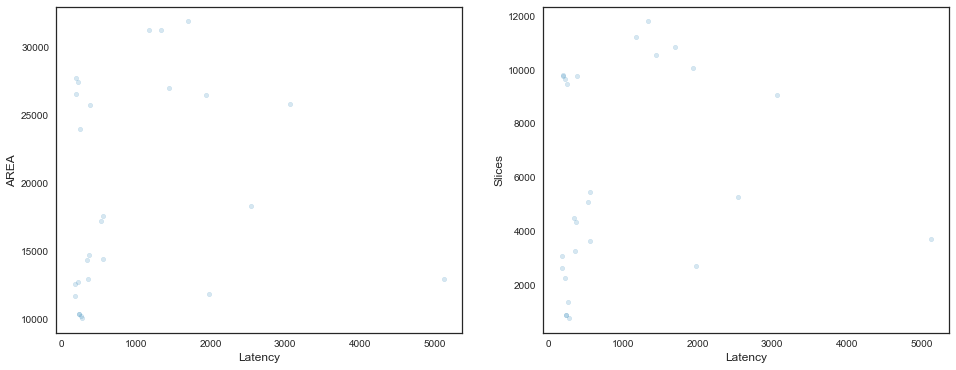

In [200]:
observe_area_slices_latency(gd.data_v4['aes'])

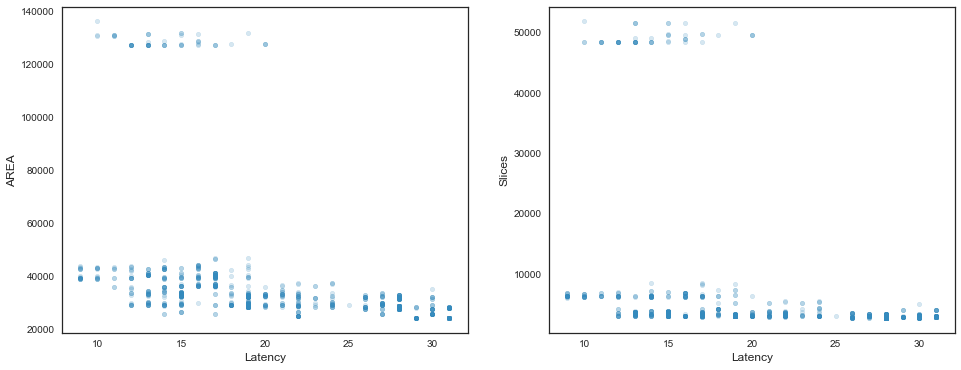

In [201]:
observe_area_slices_latency(gd.data_v4['fft_fixed'])

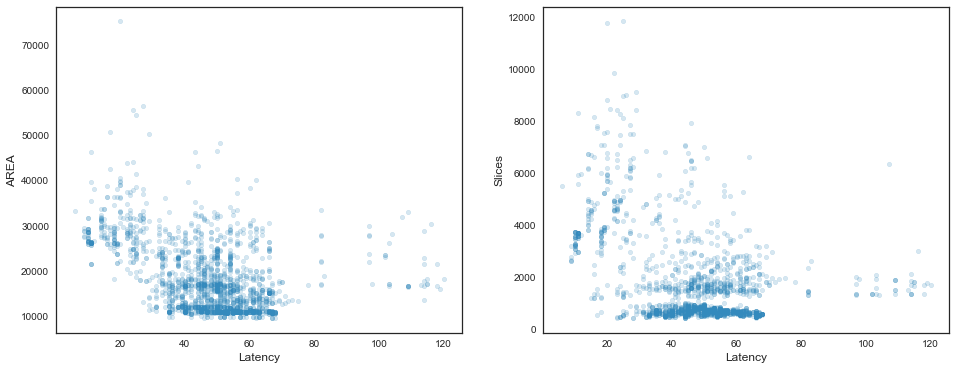

In [202]:
observe_area_slices_latency(gd.data_v4['interpolation'])

In [176]:
print(sorted(df.Latency.value_counts().keys()))

[9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]


In [180]:
df_l_9 = df[df.Latency == 9]
np.corrcoef(df_l_9.AREA, df_l_9.Slices)

array([[1.    , 0.4023],
       [0.4023, 1.    ]])

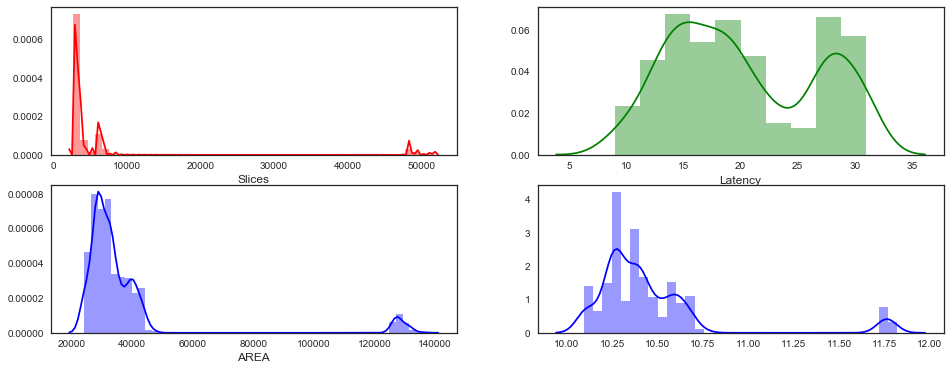

In [222]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 6))
sns.distplot(df.Slices, color='r', ax=axes[0, 0])
sns.distplot(df.Latency, color='g', ax=axes[0, 1])
sns.distplot(df.AREA, color='b', ax=axes[1, 0])
scaler = StandardScaler()
# sns.distplot(scaler.fit_transform(df.AREA.values.reshape(-1, 1)), color='b', ax=axes[1, 1])
sns.distplot(np.log(df.AREA.values), color='b', ax=axes[1, 1])

plt.show()

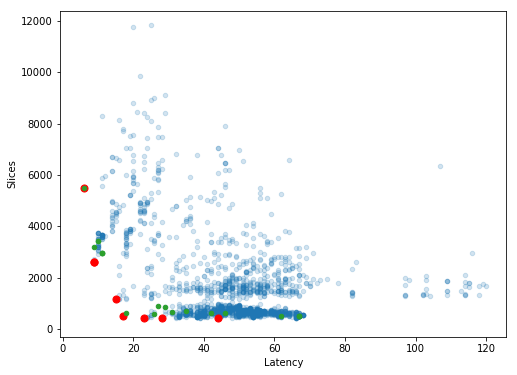

{'adrs_ave': 0.25747664042397966,
 'adrs_ave_rms': 0.16457923841384486,
 'adrs_max': 0.39851485148514854,
 'adrs_max_rms': 0.24543360236390221,
 'cardinality': 15,
 'dominance': 0.14285714285714285,
 'hypervolume': 0.5815688281237367}

In [163]:
DirectMapping.main(gd.data_v4['interpolation'], plot_figure=True)

# PCA

In [248]:
from sklearn import decomposition

In [329]:
def pca_plot(benchmark, predictors=['MUX', 'pin_pair', 'net', 'MISC']):
    df = gd.data_v4[benchmark]
    X = df[predictors]
    pca = decomposition.PCA(n_components=2)
    pca.fit(X)
    X_pca = pca.transform(X)
    
    pf_asic_bool = MultiObjective.is_pareto_efficient(df[['Latency', 'AREA']].as_matrix())
    pf_fpga_bool = MultiObjective.is_pareto_efficient(df[['Latency', 'Slices']].as_matrix())

    X_pca_df = pd.DataFrame(X_pca, columns=['x', 'y'])
    X_pca_df['PF_asic'] = pf_asic_bool
    X_pca_df['PF_fpga'] = pf_fpga_bool
    
    df_merged = pd.concat([df, X_pca_df], axis=1)

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
    X_pca_df.plot(kind='scatter', x='x', y='y', ax=axes[0])
    X_pca_df.loc[X_pca_df.PF_asic].plot(kind='scatter', x='x', y='y', color='r', ax=axes[0])
    X_pca_df.loc[X_pca_df.PF_fpga].plot(kind='scatter', x='x', y='y', color='y', ax=axes[0])
    
    df_merged.plot(kind='scatter', x='AREA', y='Slices', ax=axes[1])
    df_merged.loc[df_merged.PF_asic].plot(kind='scatter', x='AREA', y='Slices', color='r', ax=axes[1])
    df_merged.loc[df_merged.PF_fpga].plot(kind='scatter', x='AREA', y='Slices', color='y', ax=axes[1])
    plt.title(benchmark)
    plt.show()

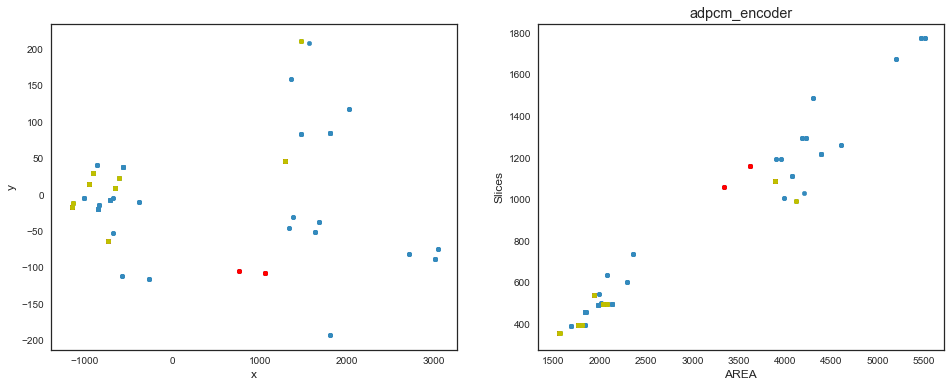

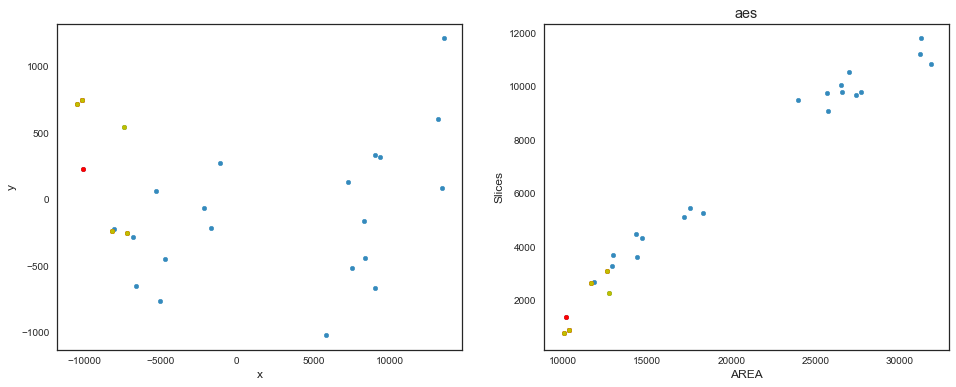

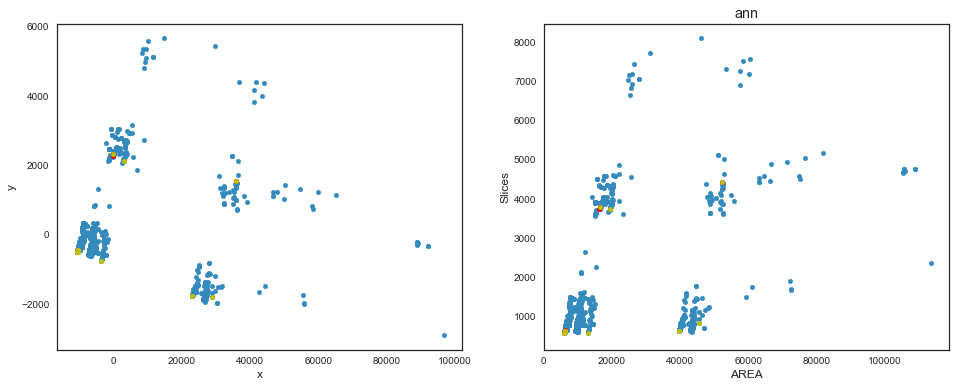

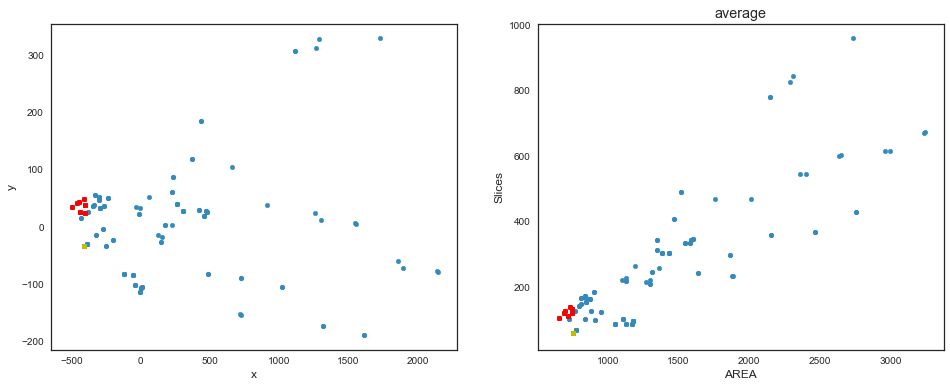

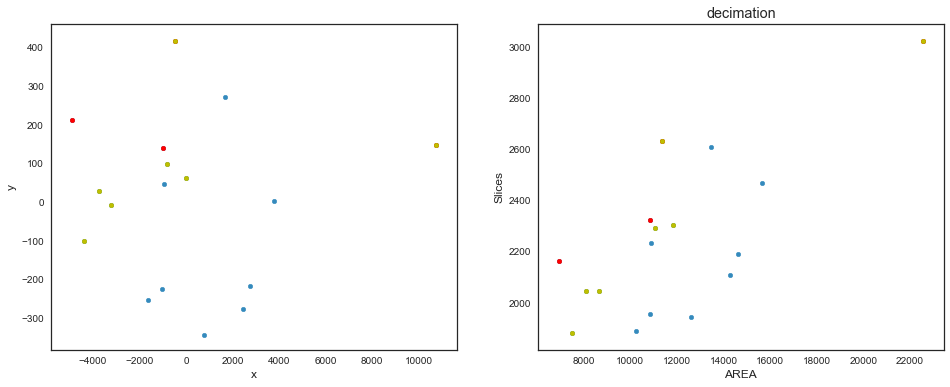

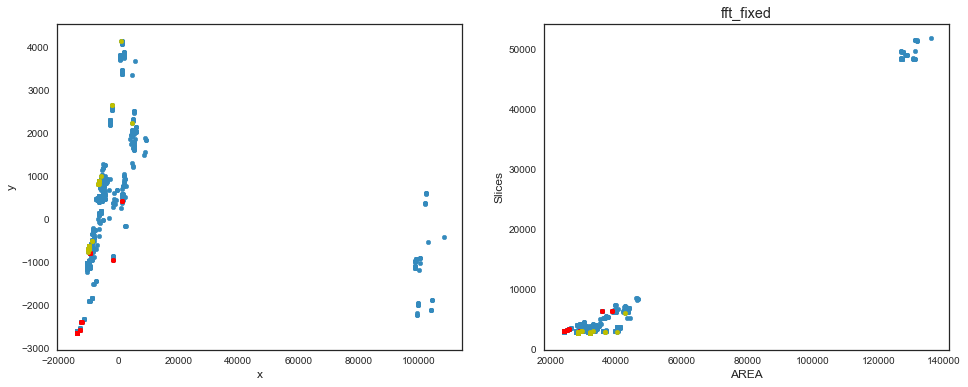

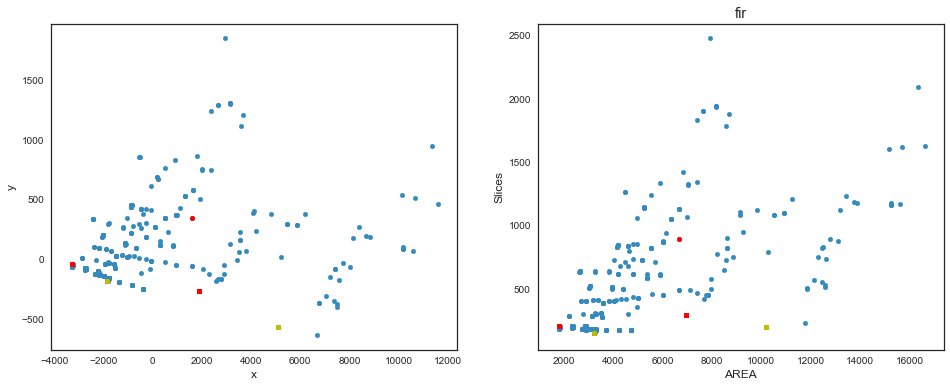

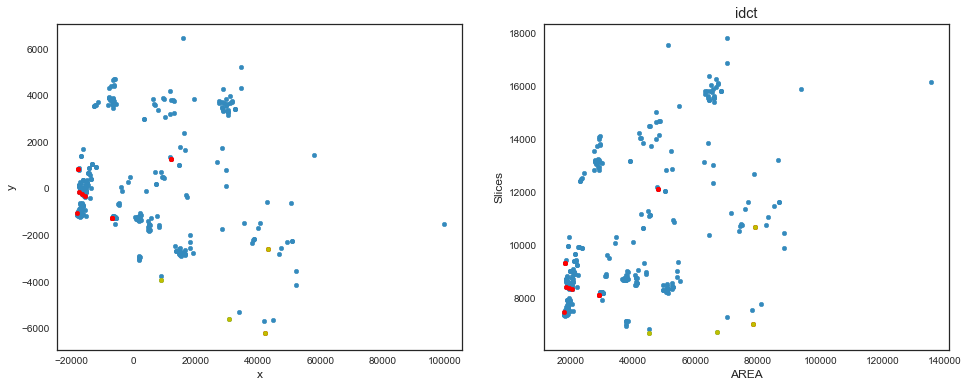

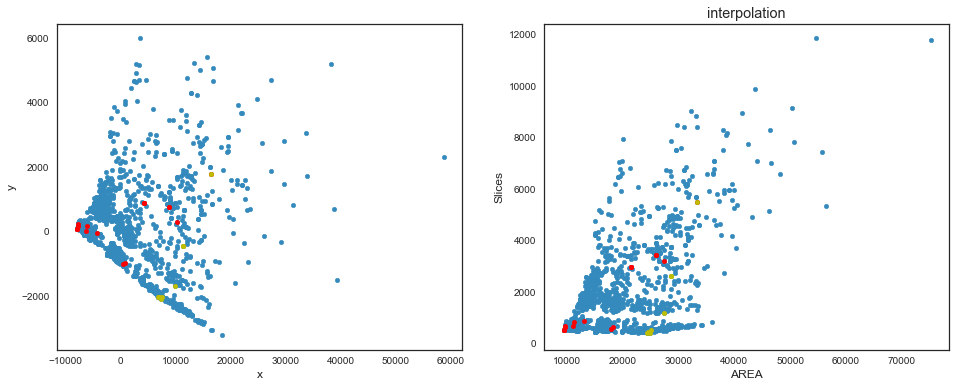

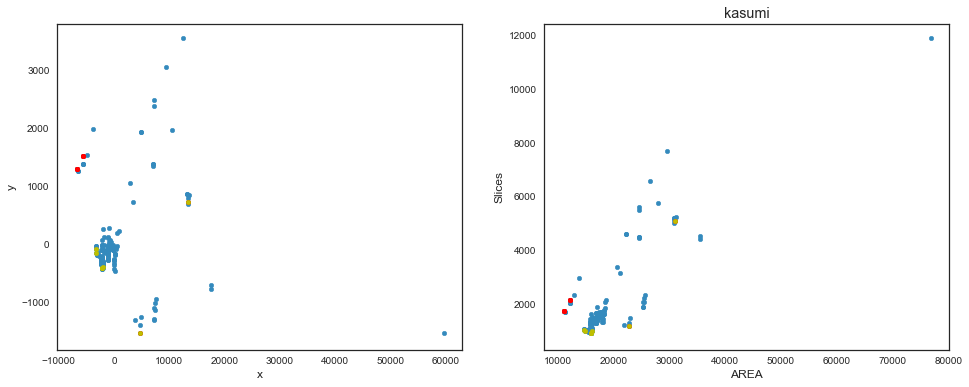

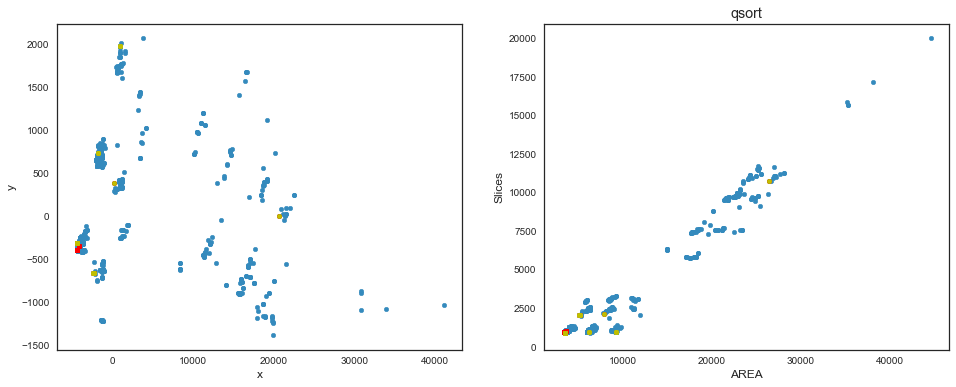

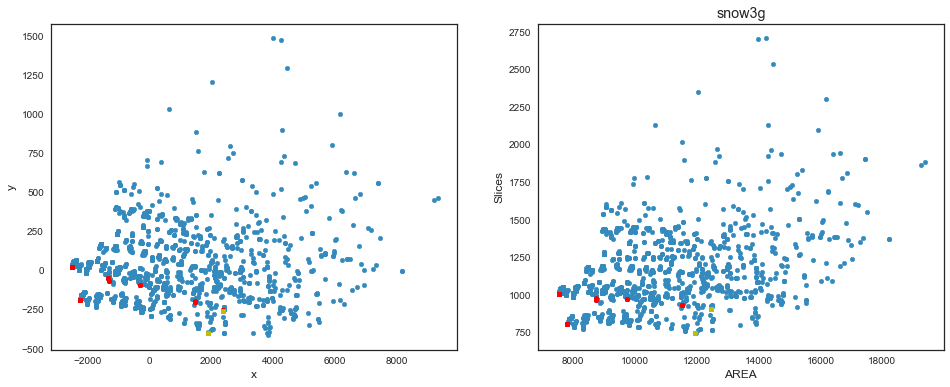

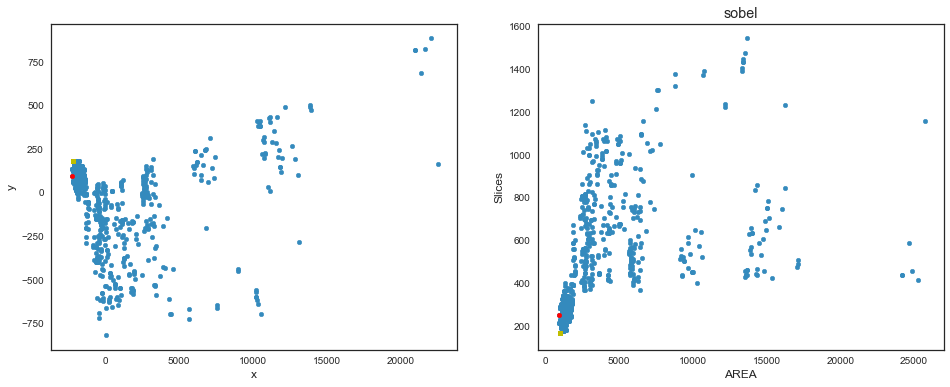

In [330]:
for i in benchmarks:
    pca_plot(i, predictors=['AREA', 'Slices'])

# ======================

Similarity measuring

In [ ]:
benchmarks = list(dm_v4['benchmark'])
metrics_moo = list(dm_v4)[1:]
metrics_moo

In [ ]:
similarity = dict()
for benchmark in benchmarks:
    similarity[benchmark] = dict(zip(benchmarks, [0] * len(benchmarks)))
    dm_metrics = dm_v4[dm_v4['benchmark'].str.contains(benchmark)][metrics_moo[:-1]].values
    es_v4_benchmark = es_v4[es_v4['test'].str.contains(benchmark)]
    adrs_bool = es_v4_benchmark[metrics_moo[:4]].values <= dm_metrics[:, :4]
    others_bool = es_v4_benchmark[metrics_moo[4:-1]].values >= dm_metrics[:, 4:]
    adrs_bool = np.all(adrs_bool, axis=1)
    others_bool = np.all(others_bool, axis=1)
    final_bool = np.all(np.c_[adrs_bool, others_bool], axis=1)
    good_combinations = es_v4_benchmark[final_bool]
    for combination in good_combinations['train']:
        combo_list = combination.split(';')
        for k in combo_list:
            similarity[benchmark][k] += 1

In [ ]:
simi_mat = pd.DataFrame(0, index=benchmarks, columns=benchmarks)
simi_mat

In [ ]:
for target, sources in similarity.items():
    for benchmark, count in sources.items():
        simi_mat.loc[benchmark, target] = count

simi_mat

In [ ]:
simi_mat_t = simi_mat.transpose()
simi_space = simi_mat + simi_mat_t
simi_space

Clustering

In [ ]:
import scipy.cluster.hierarchy as hcluster
thresh = [500, 600, 700, 800, 900, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]
for i in thresh:
    clusters = hcluster.fclusterdata(simi_space.as_matrix(), i, criterion='distance')
    print(i, clusters)

In [ ]:
kmeans_model = KMeans(n_clusters=3, random_state=42).fit(simi_space.as_matrix())
labels = kmeans_model.labels_
labels

In [ ]:
agglo_model = cluster.AgglomerativeClustering(n_clusters=3, affinity='l2', linkage='average').fit(simi_space.as_matrix())
labels = agglo_model.labels_
labels

In [ ]:
for n in range(2, len(benchmarks)):
    kmeans_model = cluster.KMeans(n_clusters=n).fit(simi_space.as_matrix())
    labels = kmeans_model.labels_
    print(n, metrics.calinski_harabaz_score(simi_space.as_matrix(), labels))

In [ ]:
for n in range(2, len(benchmarks)):
    agglo_model = cluster.AgglomerativeClustering(n_clusters=n).fit(simi_space.as_matrix())
    labels = agglo_model.labels_
    print(n, metrics.calinski_harabaz_score(simi_space.as_matrix(), labels))

For a benchmark as testing, find the benchmarks as training set that leads to better results than direct mapping.

In [ ]:
benchmark = benchmarks[2]

dm_metrics = dm_v4[dm_v4['benchmark'].str.contains(benchmark)][metrics_moo[:-1]].values

es_v4_benchmark = es_v4[es_v4['test'].str.contains(benchmark)]
adrs_bool = es_v4_benchmark[metrics_moo[:4]].values <= dm_metrics[:, :4]
others_bool = es_v4_benchmark[metrics_moo[4:-1]].values >= dm_metrics[:, 4:]

adrs_bool = np.all(adrs_bool, axis=1)

others_bool = np.all(others_bool, axis=1)

final_bool = np.all(np.c_[adrs_bool, others_bool], axis=1)

In [ ]:
dm_v4[dm_v4['benchmark'] == benchmark]

In [ ]:
es_v4_benchmark[final_bool]

With tolerance

In [ ]:
benchmark = benchmarks[2]

dm_metrics = dm_v4_01[dm_v4_01['benchmark'].str.contains(benchmark)][metrics_moo[:-1]].values

es_v4_benchmark = es_v4[es_v4['test'].str.contains(benchmark)]
adrs_bool = es_v4_benchmark[metrics_moo[:4]].values <= dm_metrics[:, :4]
others_bool = es_v4_benchmark[metrics_moo[4:-1]].values >= dm_metrics[:, 4:]

adrs_bool = np.all(adrs_bool, axis=1)

others_bool = np.all(others_bool, axis=1)

final_bool = np.all(np.c_[adrs_bool, others_bool], axis=1)

In [ ]:
dm_v4_01[dm_v4_01['benchmark'] == benchmark]

In [ ]:
es_v4_benchmark[final_bool]